<a href="https://colab.research.google.com/github/crisnandrarm/Clustering_DTI_Task/blob/main/Cluster_Analysis_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer Segmentation (Case Study: Mall Customer Dataset)**

## **Dataset Description**


Dataset ini merupakan data pelanggan mall diperoleh dari *Mall Customer Segmentation Data*. Data set cust Mall yang digunakan memiliki 5 atribut dan 200 objek data. Berikut adalah penjelasan informasi atribut:

1. **CustomerID** merupakan nomor ID yang dimiliki pelanggan
2. **Gender** merupakan jenis kelamin pelanggan
3. **Age** merupakan usia pelanggan
4. **Anual Income (k$)** merupakan pendapatan pelanggan pertahun (dalam dollar)
5. **Spending Score (1-100)** merupakan skor yang diberikan kepada pelanggan oleh otoritas mall berdasarkan pengeluaran pelanggan saat berbelanja dan perilaku pelanggan

##### **Data Source:**

https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-**python**

## **Analysis with Python Code**

### **Import Library**


In [1]:
# Library for dataset
import pandas as pd
import os
import shutil

# Library for data visualization
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from scipy.cluster.hierarchy import dendrogram
import plotly.express as px
import seaborn as sns

#Library for preprocessing data
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#Library for clusterization
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import fcluster
from scipy.cluster import hierarchy 

#Library for Evaluation
from sklearn import metrics


### **Exploratory Data Analysis**

#### **Import data**

In [2]:
# # upload kaggle.json from your kaggle account
# from google.colab import files
# kaggle_json_upload = files.upload()

# !mkdir /root/.kaggle/
# shutil.copy('kaggle.json', '/root/.kaggle/kaggle.json')
# os.chmod('/root/.kaggle/kaggle.json', 600)
# import kaggle

In [3]:
# !kaggle datasets download -d vjchoudhary7/customer-segmentation-tutorial-in-python

In [4]:
!ls

customer-segmentation-tutorial-in-python.zip  kaggle.json  sample_data


In [5]:
cust_data = pd.read_csv('customer-segmentation-tutorial-in-python.zip',index_col='CustomerID')
cust_data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [6]:
cust_data.rename(columns = {'Annual Income (k$)': 'Annual Income','Spending Score (1-100)': 'Spending Score'}, inplace = True)

#### **Data Information**

In [7]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Gender          200 non-null    object
 1   Age             200 non-null    int64 
 2   Annual Income   200 non-null    int64 
 3   Spending Score  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


Dari informasi diatas kita dapat mengetahui bahwa seluruh atribut dalam yang digunakan tidak memiliki missing value sehingga tidak perlu dilakukan penanganan terhadap missing value saat tahap preprocessing

In [8]:
cust_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual Income,200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Spending Score,200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


Dari deskripsi tabel diatas kita dapat melihat bahwa setiap atribut numerik memiliki interval yang berbeda. Maka dari itu data harus dinormalisasi atau distandardisasi agar menghindari ketergantunagan pada satuan pengukuran dan proses pembelajaran tidak bias. Proses normalisasi akan dilakukan pada tahap preprocessing data

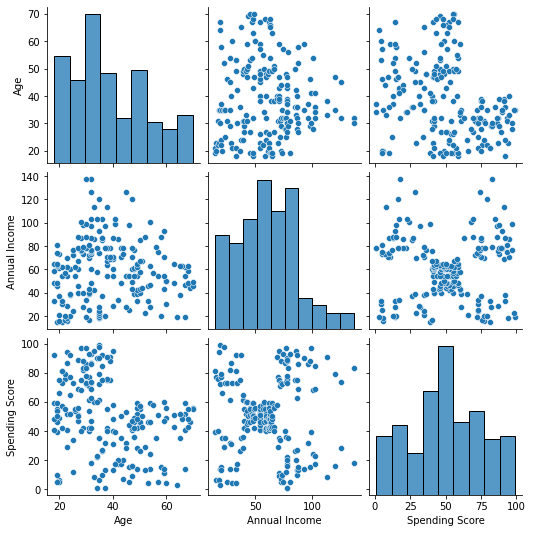

In [9]:
sns.pairplot(cust_data)

Terdapat beberapa hal dapat kita perhatikan dari deskripsi tabel diatas antara lain:
1. Usia minimum pelanggan adalah 18 tahun dan usia maksimal pelanggan 70. Dari histogram usia kita juga dapat mengetahui bahwa lebih banyak pelanggan dengan usia yang lebih muda

2. Pendapatan tahunan (Annual Income) minimum dari pelanggan mall adalah 1500 dollar dan maksimumnya adalah 137000 dollar

3. Minimum Spending Score adalah 1 dan maksimalnya adalah 99

#### **Data Visualization**


In [10]:
# !pip install plotly

In [11]:
fig = px.scatter_3d(cust_data, x='Age', y='Annual Income', z='Spending Score',color='Gender', size_max=18, symbol='Gender', opacity=0.7)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

##### **Data Visualization for Gender Female**


In [12]:
fig = px.scatter_3d(cust_data.loc[cust_data['Gender'] == 'Female'], x='Age', y='Annual Income', z='Spending Score', size_max=18, opacity=0.7)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

##### **Data Visualization for Gender Male**


In [13]:
fig = px.scatter_3d(cust_data.loc[cust_data['Gender'] == 'Male'], x='Age', y='Annual Income', z='Spending Score', size_max=18, opacity=0.7)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

Dari visualisasi data diatas kita dapat melihat bahwa atribut gender terdistribusi secara merata baik *Female* maupun *Male*.

#### **Checking Data Outliers**

In [14]:
lb_make = LabelEncoder()
cust_data_encode = cust_data.copy()
for i in cust_data.columns:
  if cust_data.dtypes[i] == "O":
    cust_data_encode[i] = lb_make.fit_transform(cust_data[i])
cust_data_encode.head()

,Gender,Age,Annual Income,Spending Score
CustomerID,,,,
1,1,19,15,39
2,1,21,15,81
3,0,20,16,6
4,0,23,16,77
5,0,31,17,40


,count,mean,std,min,25%,50%,75%,max
Male,88.0,39.806818,15.514812,18.0,27.75,37.0,50.5,70.0
Female,112.0,38.098214,12.644095,18.0,29.00,35.0,47.5,68.0


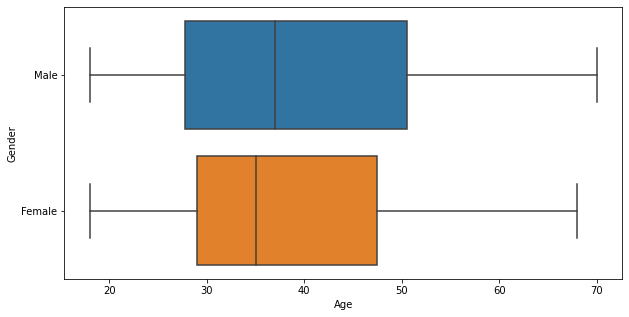

In [15]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Age',y='Gender',data=cust_data, orient='h')
age_cust_data = pd.DataFrame()
age_cust_data['Male'] = (cust_data[cust_data['Gender'] == 'Male'][['Gender','Age']].describe())['Age']
age_cust_data['Female'] = (cust_data[cust_data['Gender'] == 'Female'][['Gender','Age']].describe())['Age']
age_cust_data.transpose()


,count,mean,std,min,25%,50%,75%,max
Male,88.0,62.227273,26.638373,15.0,45.50,62.5,78.00,137.0
Female,112.0,59.250000,26.011952,16.0,39.75,60.0,77.25,126.0


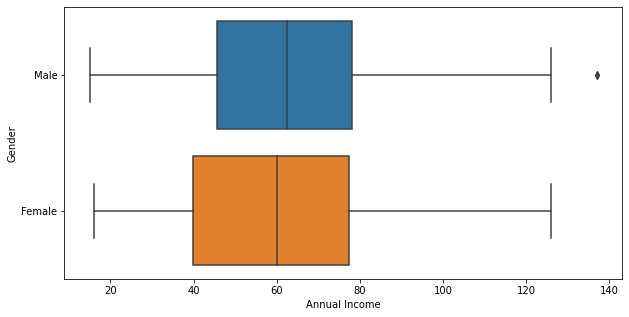

In [16]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Annual Income',y='Gender',data=cust_data, orient='h')
age_cust_data = pd.DataFrame()
age_cust_data['Male'] = (cust_data[cust_data['Gender'] == 'Male'][['Gender','Annual Income']].describe())['Annual Income']
age_cust_data['Female'] = (cust_data[cust_data['Gender'] == 'Female'][['Gender','Annual Income']].describe())['Annual Income']
age_cust_data.transpose()

,count,mean,std,min,25%,50%,75%,max
Male,88.0,48.511364,27.89677,1.0,24.5,50.0,70.0,97.0
Female,112.0,51.526786,24.11495,5.0,35.0,50.0,73.0,99.0


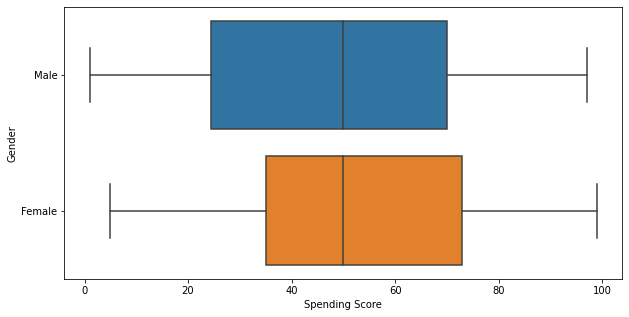

In [17]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Spending Score',y='Gender',data=cust_data, orient='h')
age_cust_data = pd.DataFrame()
age_cust_data['Male'] = (cust_data[cust_data['Gender'] == 'Male'][['Gender','Spending Score']].describe())['Spending Score']
age_cust_data['Female'] = (cust_data[cust_data['Gender'] == 'Female'][['Gender','Spending Score']].describe())['Spending Score']
age_cust_data.transpose()

In [18]:
Q1 = cust_data_encode.quantile(0.25)
Q3 = cust_data_encode.quantile(0.75)
IQR = Q3 - Q1
((cust_data_encode < (Q1 - 1.5 * IQR)) | (cust_data_encode > (Q3 + 1.5 * IQR))).sum()

Gender            0
Age               0
Annual Income     2
Spending Score    0
dtype: int64

Dari boxplot diatas kita dapat mengetahui terdapat beberapa atribut yang memiliki outlier. Terdapat 2 object yang dikategorikan sebagai outlier pada attribute `Annual Income` di `Gender` Male. Dari Boxplot diatas juga terdapat beberapa hal yang dapat diperhatikan seperti:

1. Rata-rata spending score untuk pelanggan laki-laki adalah 48.5 sedangkan untuk pelanggan perempuan adalah 51.52 yang artinya wanita cenderung lebih banyak mengeluarkan uang untuk berbelanja

2. Rata-rata pendapatan pertahun untuk pelanggan laki-laki adalah 62.227 sedangkan untuk pelanggan perempuan adalah 69.250 pertahun. Hal ini menandakan bahwa terdapat kemungkinan bahwa terdapat korelasi positif antara Annual Income dengan Spending Score

#### **Attribute Correlation**

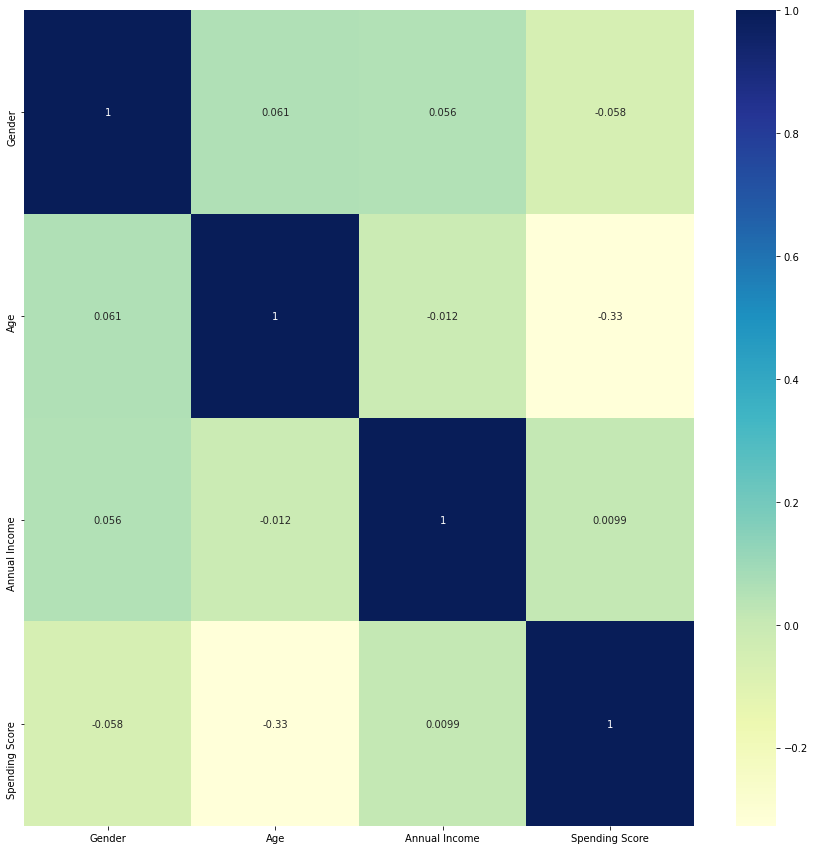

In [19]:
# heatmap columns correlation
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(cust_data_encode.corr(), annot=True,cmap="YlGnBu" )

Dari heatmap diatas, tidak terdapat attribut yang memiliki strong correlation, maka dari itu seluruh atribut nantinya akan digunakan pada proses klasterisasi

### **Preprocessing**


#### **Data Normalization**

In [20]:
clust_data = cust_data_encode.drop(columns='Gender')
x = clust_data.values
# x

In [21]:
zscaler = preprocessing.StandardScaler()
x_scaled = zscaler.fit_transform(x)
clust_data = pd.DataFrame(x_scaled,columns=clust_data.columns)
clust_data.head()

,Age,Annual Income,Spending Score
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [22]:
clust_data['Gender'] = cust_data_encode['Gender'].values
clust_data

,Age,Annual Income,Spending Score,Gender
0,-1.424569,-1.738999,-0.434801,1
1,-1.281035,-1.738999,1.195704,1
2,-1.352802,-1.700830,-1.715913,0
3,-1.137502,-1.700830,1.040418,0
4,-0.563369,-1.662660,-0.395980,0
...,...,...,...,...
195,-0.276302,2.268791,1.118061,0
196,0.441365,2.497807,-0.861839,0
197,-0.491602,2.497807,0.923953,1
198,-0.491602,2.917671,-1.250054,1


In [23]:
fig = px.scatter_3d(clust_data, x='Age', y='Annual Income', z='Spending Score', color='Gender', symbol='Gender',size_max=18, opacity=0.7)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

### **K-Means Clustering**


#### **Search for the Optimum Number of Clusters (k)**

Text(0, 0.5, 'Inertia')

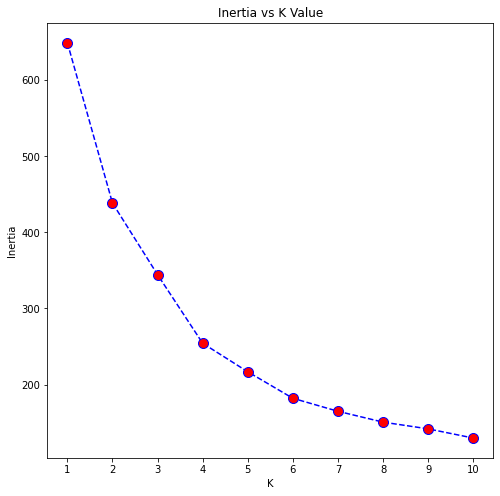

In [24]:
from sklearn.cluster import KMeans
inertia_list = []
for i in range(1,11):
    
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(clust_data)
    inertia_list.append(kmeans.inertia_)
plt.figure(figsize = (8,8))
plt.plot(range(1,11), inertia_list, color = 'blue', linestyle = 'dashed', marker ='o', markerfacecolor = 'red',
         markersize = 10)
plt.title('Inertia vs K Value')
plt.xticks(range(1,11, 1))
plt.xlabel('K')
plt.ylabel('Inertia')

For n_clusters =  2 , The average silhouette_score is: 0.3031976564160757
For n_clusters =  3 , The average silhouette_score is: 0.3142800845203407
For n_clusters =  4 , The average silhouette_score is: 0.3502702043465398
For n_clusters =  5 , The average silhouette_score is: 0.34977050035201074
For n_clusters =  6 , The average silhouette_score is: 0.356485834425401
For n_clusters =  7 , The average silhouette_score is: 0.33788007912405765
For n_clusters =  8 , The average silhouette_score is: 0.33585047460578055
For n_clusters =  9 , The average silhouette_score is: 0.331000653271137
For n_clusters =  10 , The average silhouette_score is: 0.3116004895189333


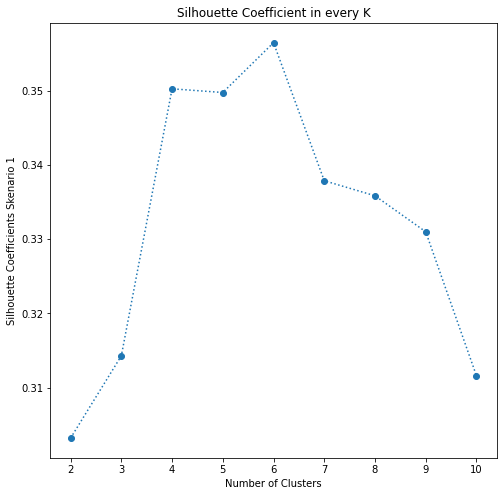

In [25]:
# Silhoutte Method
silsc = []
max_sc_kmeans=-999
for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(clust_data)
    label = kmeans.labels_
    sc_score = metrics.silhouette_score(clust_data, label, metric='euclidean')
    ch_score = metrics.calinski_harabasz_score(clust_data, label)
    db_score = metrics.davies_bouldin_score(clust_data, label)
    print("For n_clusters = ", n_cluster, ", The average silhouette_score is:", sc_score)
    if sc_score>= max_sc_kmeans:
          max_sc_kmeans = sc_score
          max_ch_kmeans = ch_score
          max_db_kmeans = db_score
          max_k_kmeans = n_cluster
    silsc.append(sc_score)

# Visualize
plt.figure(figsize = (8,8))
plt.plot(range(2,11),silsc,'o:')
plt.title("Silhouette Coefficient in every K")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficients Skenario 1")
plt.show()

Dari grafik elbow method, grafik mulai melandai setelah titik 6 dan pada grafik silhouette coefficient (SC) nilai SC tertinggi diperoleh pada titik 6. Oleh karena itu k yang digunakan pada algoritma K-means adalah k=6

#### **Modeling K-Means**

In [26]:
# Apply the K-Means Model to the Data
kmeans = KMeans(n_clusters=max_k_kmeans, init='k-means++', max_iter=10, n_init=10, random_state=0)
cluster = kmeans.fit_predict(clust_data)
clust_data["label"] = kmeans.labels_
clust_data.head()

,Age,Annual Income,Spending Score,Gender,label
0,-1.424569,-1.738999,-0.434801,1,3
1,-1.281035,-1.738999,1.195704,1,3
2,-1.352802,-1.700830,-1.715913,0,4
3,-1.137502,-1.700830,1.040418,0,3
4,-0.563369,-1.662660,-0.395980,0,4


In [27]:
# Visualising Clusters for k=6
fig = px.scatter_3d(clust_data, x='Age', y='Annual Income', z='Spending Score',color='label', symbol='Gender',size_max=18, opacity=0.7)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

### **Agglomeration Clustering (AGNES)**


#### **Ward Method**

##### **Visualization by Dendrogram**


In [28]:
link = 'ward'
clust_data = clust_data.drop(columns='label')
Z = hierarchy.linkage(clust_data, link)

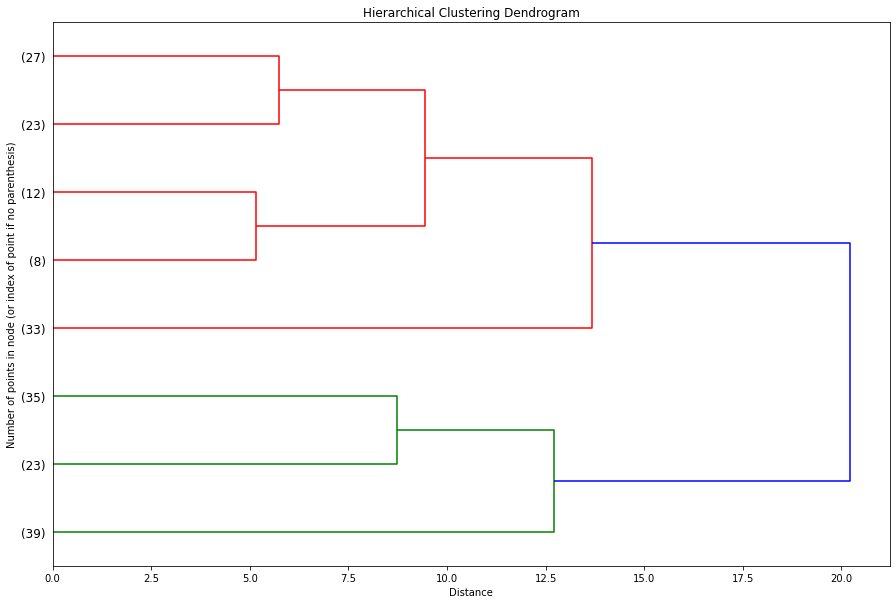

In [29]:
figure(num=None, figsize=(15,10), facecolor='w', edgecolor='k')
plt.title('Hierarchical Clustering Dendrogram')

# plot the top 8 levels of the dendrogram
dendrogram(Z, truncate_mode='lastp',p=8, orientation="right")
plt.ylabel("Number of points in node (or index of point if no parenthesis)")
plt.xlabel("Distance")
plt.show()

In [30]:
max_sc_ward=-999
for n_cluster in range(2,11):
    label= fcluster(Z, n_cluster, criterion='maxclust')
    sc_score = metrics.silhouette_score(clust_data, label, metric='euclidean')
    ch_score = metrics.calinski_harabasz_score(clust_data, label)
    db_score = metrics.davies_bouldin_score(clust_data, label)
    print("For n_clusters = ", n_cluster, ", The average silhouette_score is:", sc_score)
    if sc_score>= max_sc_ward:
          max_sc_ward = sc_score
          max_ch_ward = ch_score
          max_db_ward = db_score
          max_k_ward = n_cluster

print('So k with highest SC is: ',max_k_ward)

For n_clusters =  2 , The average silhouette_score is: 0.2923040670626512
For n_clusters =  3 , The average silhouette_score is: 0.30972453727559257
For n_clusters =  4 , The average silhouette_score is: 0.3299052543211478
For n_clusters =  5 , The average silhouette_score is: 0.3477559149875169
For n_clusters =  6 , The average silhouette_score is: 0.3504439354681972
For n_clusters =  7 , The average silhouette_score is: 0.31540515140480885
For n_clusters =  8 , The average silhouette_score is: 0.3251665677691028
For n_clusters =  9 , The average silhouette_score is: 0.3232594519434537
For n_clusters =  10 , The average silhouette_score is: 0.3246005763651097
So k with highest SC is:  6


##### **Modeling AGNES**

In [31]:
# Apply the Hierarchical Clustering Model to the Dataset
cluster_labels= fcluster(Z, max_k_ward, criterion='maxclust')
clust_data["label"] = cluster_labels
clust_data.head()

,Age,Annual Income,Spending Score,Gender,label
0,-1.424569,-1.738999,-0.434801,1,5
1,-1.281035,-1.738999,1.195704,1,2
2,-1.352802,-1.700830,-1.715913,0,5
3,-1.137502,-1.700830,1.040418,0,2
4,-0.563369,-1.662660,-0.395980,0,5


In [32]:
# Visualising Clusters for k=6
fig = px.scatter_3d(clust_data, x='Age', y='Annual Income', z='Spending Score',color='label',symbol='Gender', size_max=18, opacity=0.7)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

#### **Single Method**

##### **Visualization by Dendrogram**


In [33]:
link = 'single'
clust_data = clust_data.drop(columns='label')
Z = hierarchy.linkage(clust_data, link)

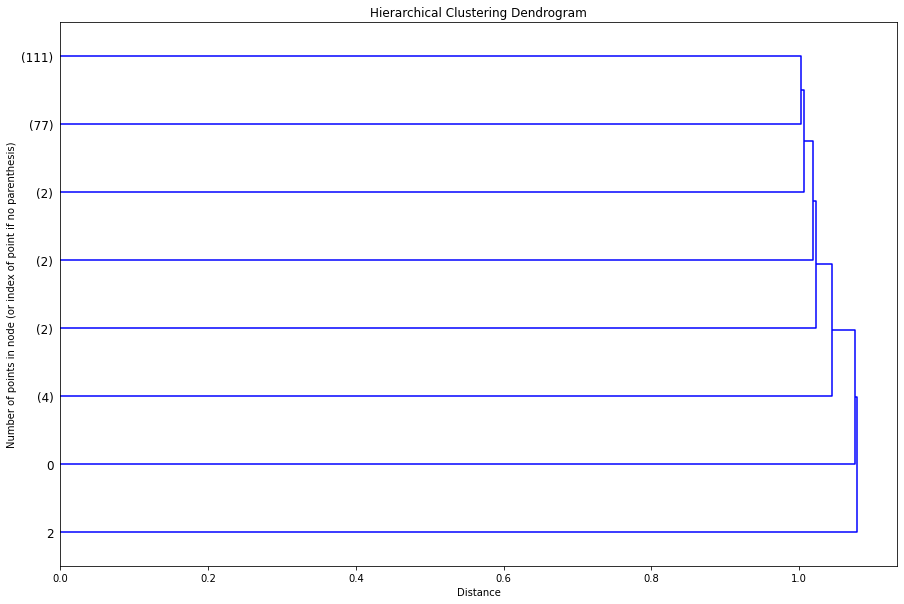

<function dendrogram at 0x7f563341d6a8>


In [34]:
figure(num=None, figsize=(15,10), facecolor='w', edgecolor='k')
plt.title('Hierarchical Clustering Dendrogram')

# plot the top 8 levels of the dendrogram
dendrogram(Z, truncate_mode='lastp',p=8, orientation="right")
plt.ylabel("Number of points in node (or index of point if no parenthesis)")
plt.xlabel("Distance")
plt.show()

print(dendrogram)

In [35]:
max_sc_single=-999
for n_cluster in range(2,11):
    label= fcluster(Z, n_cluster, criterion='maxclust')
    sc_score = metrics.silhouette_score(clust_data, label, metric='euclidean')
    ch_score = metrics.calinski_harabasz_score(clust_data, label)
    db_score = metrics.davies_bouldin_score(clust_data, label)
    print("For n_clusters = ", n_cluster, ", The average silhouette_score is:", sc_score)
    if sc_score>= max_sc_single:
          max_sc_single = sc_score
          max_ch_single = ch_score
          max_db_single = db_score
          max_k_single = n_cluster

print('So k with highest SC is: ',max_k_single)

For n_clusters =  2 , The average silhouette_score is: 0.23042519588412858
For n_clusters =  3 , The average silhouette_score is: 0.11180917042975475
For n_clusters =  4 , The average silhouette_score is: 0.03718689467429146
For n_clusters =  5 , The average silhouette_score is: -0.04459524320471739
For n_clusters =  6 , The average silhouette_score is: -0.07055257740831478
For n_clusters =  7 , The average silhouette_score is: -0.09326014860280175
For n_clusters =  8 , The average silhouette_score is: -0.06119821728994733
For n_clusters =  9 , The average silhouette_score is: -0.08663367262936837
For n_clusters =  10 , The average silhouette_score is: -0.09756815988513626
So k with highest SC is:  2


##### **Modeling AGNES**

In [36]:
# Apply the Hierarchical Clustering Model to the Dataset
cluster_labels= fcluster(Z, max_k_single, criterion='maxclust')
clust_data["label"] = cluster_labels
clust_data.head()

,Age,Annual Income,Spending Score,Gender,label
0,-1.424569,-1.738999,-0.434801,1,1
1,-1.281035,-1.738999,1.195704,1,1
2,-1.352802,-1.700830,-1.715913,0,2
3,-1.137502,-1.700830,1.040418,0,1
4,-0.563369,-1.662660,-0.395980,0,1


In [37]:
# Visualising Clusters
fig = px.scatter_3d(clust_data, x='Age', y='Annual Income', z='Spending Score',color='label',symbol='Gender', size_max=18, opacity=0.7)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

#### **Complete Method**

##### **Visualization by Dendrogram**


In [38]:
link = 'complete'
clust_data = clust_data.drop(columns='label')
Z = hierarchy.linkage(clust_data, link)

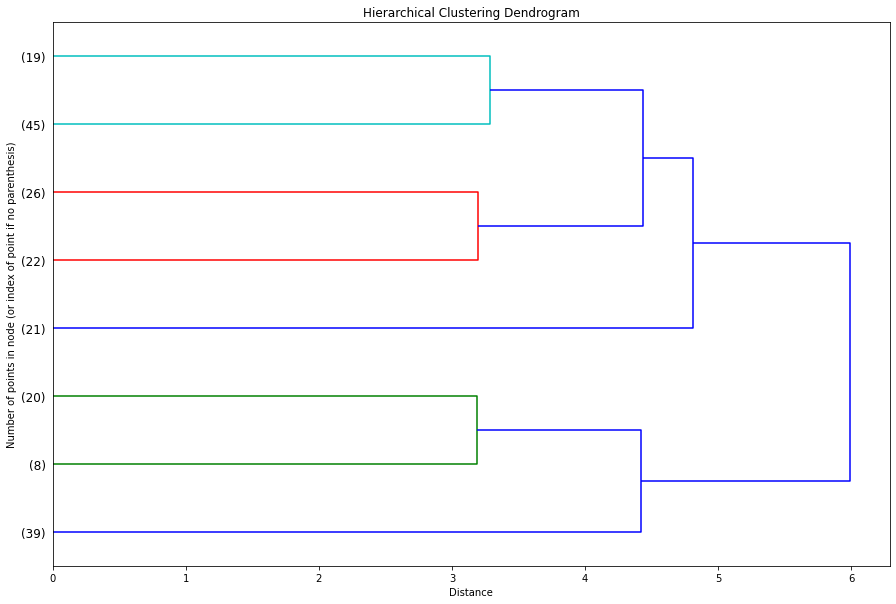

In [39]:
figure(num=None, figsize=(15,10), facecolor='w', edgecolor='k')
plt.title('Hierarchical Clustering Dendrogram')

# plot the top 8 levels of the dendrogram
dendrogram(Z, truncate_mode='lastp',p=8, orientation="right",labels=clust_data.index)
plt.ylabel("Number of points in node (or index of point if no parenthesis)")
plt.xlabel("Distance")
plt.show()

In [40]:
max_sc_complete=-999
for n_cluster in range(2,11):
    label= fcluster(Z, n_cluster, criterion='maxclust')
    sc_score = metrics.silhouette_score(clust_data, label, metric='euclidean')
    ch_score = metrics.calinski_harabasz_score(clust_data, label)
    db_score = metrics.davies_bouldin_score(clust_data, label)
    print("For n_clusters = ", n_cluster, ", The average silhouette_score is:", sc_score)
    if sc_score>= max_sc_complete:
          max_sc_complete = sc_score
          max_ch_complete = ch_score
          max_db_complete = db_score
          max_k_complete = n_cluster

print('So k with highest SC, CH and DB score is: ',max_k_complete)

For n_clusters =  2 , The average silhouette_score is: 0.20507935432314284
For n_clusters =  3 , The average silhouette_score is: 0.19461994066369875
For n_clusters =  4 , The average silhouette_score is: 0.241642272927867
For n_clusters =  5 , The average silhouette_score is: 0.3404764937897312
For n_clusters =  6 , The average silhouette_score is: 0.33892565082159215
For n_clusters =  7 , The average silhouette_score is: 0.31109980258465664
For n_clusters =  8 , The average silhouette_score is: 0.3019605722884507
For n_clusters =  9 , The average silhouette_score is: 0.2974714880777752
For n_clusters =  10 , The average silhouette_score is: 0.2973696033879066
So k with highest SC, CH and DB score is:  5


##### **Modeling AGNES**

In [41]:
# Apply the Hierarchical Clustering Model to the Dataset
cluster_labels= fcluster(Z, max_k_complete, criterion='maxclust')
clust_data["label"] = cluster_labels
clust_data.head()

,Age,Annual Income,Spending Score,Gender,label
0,-1.424569,-1.738999,-0.434801,1,4
1,-1.281035,-1.738999,1.195704,1,3
2,-1.352802,-1.700830,-1.715913,0,4
3,-1.137502,-1.700830,1.040418,0,3
4,-0.563369,-1.662660,-0.395980,0,4


In [42]:
# Visualising Clusters for k=7
fig = px.scatter_3d(clust_data, x='Age', y='Annual Income', z='Spending Score',color='label',symbol='Gender', size_max=18, opacity=0.7)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

#### **Centroid Method**

##### **Visualization by Dendrogram**


In [43]:
link = 'centroid'
clust_data = clust_data.drop(columns='label')
Z = hierarchy.linkage(clust_data, link)

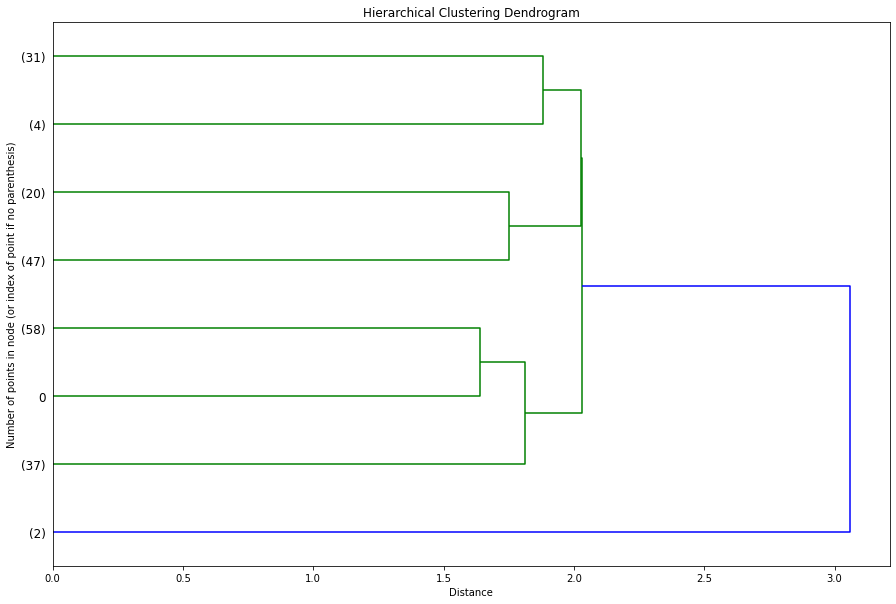

In [44]:
figure(num=None, figsize=(15,10), facecolor='w', edgecolor='k')
plt.title('Hierarchical Clustering Dendrogram')

# plot the top 8 levels of the dendrogram
dendrogram(Z, truncate_mode='lastp',p=8, orientation="right",labels=clust_data.index)
plt.ylabel("Number of points in node (or index of point if no parenthesis)")
plt.xlabel("Distance")
plt.show()

In [45]:
max_sc_centroid=-999
for n_cluster in range(2,11):
    label= fcluster(Z, n_cluster, criterion='maxclust')
    sc_score = metrics.silhouette_score(clust_data, label, metric='euclidean')
    ch_score = metrics.calinski_harabasz_score(clust_data, label)
    db_score = metrics.davies_bouldin_score(clust_data, label)
    print("For n_clusters = ", n_cluster, ", The average silhouette_score is:", sc_score)
    if sc_score>= max_sc_centroid:
          max_sc_centroid = sc_score
          max_ch_centroid = ch_score
          max_db_centroid = db_score
          max_k_centroid = n_cluster

print('So k with highest SC, CH and DB score is: ',max_k_centroid)

For n_clusters =  2 , The average silhouette_score is: 0.272601303994981
For n_clusters =  3 , The average silhouette_score is: 0.2445508631051296
For n_clusters =  4 , The average silhouette_score is: 0.27282623293287567
For n_clusters =  5 , The average silhouette_score is: 0.23629350299835736
For n_clusters =  6 , The average silhouette_score is: 0.2952137192022824
For n_clusters =  7 , The average silhouette_score is: 0.3173736118482244
For n_clusters =  8 , The average silhouette_score is: 0.3173736118482244
For n_clusters =  9 , The average silhouette_score is: 0.3233780244557681
For n_clusters =  10 , The average silhouette_score is: 0.31985008627243544
So k with highest SC, CH and DB score is:  9


##### **Modeling AGNES**

In [46]:
# Apply the Hierarchical Clustering Model to the Dataset
cluster_labels= fcluster(Z, max_k_centroid, criterion='maxclust')
clust_data["label"] = cluster_labels
clust_data.head()

,Age,Annual Income,Spending Score,Gender,label
0,-1.424569,-1.738999,-0.434801,1,5
1,-1.281035,-1.738999,1.195704,1,4
2,-1.352802,-1.700830,-1.715913,0,7
3,-1.137502,-1.700830,1.040418,0,4
4,-0.563369,-1.662660,-0.395980,0,7


In [47]:
# Visualising Clusters for k=6
fig = px.scatter_3d(clust_data, x='Age', y='Annual Income', z='Spending Score',color='label',symbol='Gender', size_max=18, opacity=0.7)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

#### **Average Method**

##### **Visualization by Dendrogram**


In [48]:
link = 'average'
clust_data = clust_data.drop(columns='label')
Z = hierarchy.linkage(clust_data, link)

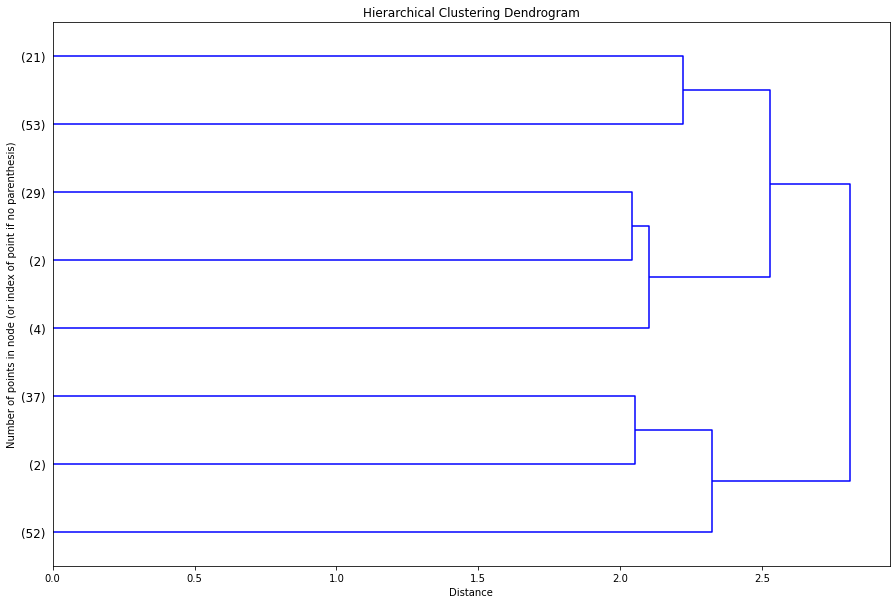

In [49]:
figure(num=None, figsize=(15,10), facecolor='w', edgecolor='k')
plt.title('Hierarchical Clustering Dendrogram')

# plot the top 8 levels of the dendrogram
dendrogram(Z, truncate_mode='lastp',p=8, orientation="right",labels=clust_data.index)
plt.ylabel("Number of points in node (or index of point if no parenthesis)")
plt.xlabel("Distance")
plt.show()

In [50]:
max_sc_average=-999
for n_cluster in range(2,11):
    label= fcluster(Z, n_cluster, criterion='maxclust')
    sc_score = metrics.silhouette_score(clust_data, label, metric='euclidean')
    ch_score = metrics.calinski_harabasz_score(clust_data, label)
    db_score = metrics.davies_bouldin_score(clust_data, label)
    print("For n_clusters = ", n_cluster, ", The average silhouette_score is:", sc_score)
    if sc_score>= max_sc_average:
          max_sc_average = sc_score
          max_ch_average = ch_score
          max_db_average = db_score
          max_k_average = n_cluster

print('So k with highest SC, CH and DB score is: ',max_k_average)

For n_clusters =  2 , The average silhouette_score is: 0.2935468930616447
For n_clusters =  3 , The average silhouette_score is: 0.3022521726480174
For n_clusters =  4 , The average silhouette_score is: 0.3326718554376819
For n_clusters =  5 , The average silhouette_score is: 0.35123598270150214
For n_clusters =  6 , The average silhouette_score is: 0.33333991452459744
For n_clusters =  7 , The average silhouette_score is: 0.31537202202291614
For n_clusters =  8 , The average silhouette_score is: 0.31264492859957327
For n_clusters =  9 , The average silhouette_score is: 0.3016357099035446
For n_clusters =  10 , The average silhouette_score is: 0.31947146894705164
So k with highest SC, CH and DB score is:  5


##### **Modeling AGNES**

In [51]:
# Apply the Hierarchical Clustering Model to the Dataset
cluster_labels= fcluster(Z, max_k_average, criterion='maxclust')
clust_data["label"] = cluster_labels
clust_data.head()

,Age,Annual Income,Spending Score,Gender,label
0,-1.424569,-1.738999,-0.434801,1,5
1,-1.281035,-1.738999,1.195704,1,1
2,-1.352802,-1.700830,-1.715913,0,5
3,-1.137502,-1.700830,1.040418,0,1
4,-0.563369,-1.662660,-0.395980,0,5


In [52]:
# Visualising Clusters for k=6
fig = px.scatter_3d(clust_data, x='Age', y='Annual Income', z='Spending Score',color='label',symbol='Gender', size_max=18, opacity=0.7)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

### **Cluster Quality Comparation**

In [53]:
# Comparing Cluster Quality
print("________K-MEANS_________")
print("SC =", max_sc_kmeans)
print("CH Score=", max_ch_kmeans)
print("DB Score =", max_db_kmeans)
print("Final k =", max_k_kmeans)
print("________Ward_________")
print("SC =", max_sc_ward)
print("CH Score=", max_ch_ward)
print("DB Score =", max_db_ward)
print("Final k =", max_k_ward)
print("________Single_________")
print("SC =", max_sc_single)
print("CH Score=", max_ch_single)
print("DB Score =", max_db_single)
print("Final k =", max_k_single)
print("________Complete_________")
print("SC =", max_sc_complete)
print("CH Score=", max_ch_complete)
print("DB Score =", max_db_complete)
print("Final k =", max_k_complete)
print("________Centroid_________")
print("SC =", max_sc_centroid)
print("CH Score=", max_ch_centroid)
print("DB Score =", max_db_centroid)
print("Final k =", max_k_centroid)
print("________Average_________")
print("SC =", max_sc_average)
print("CH Score=", max_ch_average)
print("DB Score =", max_db_average)
print("Final k =", max_k_average)

________K-MEANS_________
SC = 0.356485834425401
CH Score= 99.6548785110883
DB Score = 1.0050904211940697
Final k = 6
________Ward_________
SC = 0.3504439354681972
CH Score= 95.2576612909977
DB Score = 1.0086149926438526
Final k = 6
________Single_________
SC = 0.23042519588412858
CH Score= 2.4389146297438806
DB Score = 0.6036769210648909
Final k = 2
________Complete_________
SC = 0.3404764937897312
CH Score= 92.99085717114225
DB Score = 1.0341672928753236
Final k = 5
________Centroid_________
SC = 0.3233780244557681
CH Score= 72.10709000068678
DB Score = 0.8497644223770475
Final k = 9
________Average_________
SC = 0.35123598270150214
CH Score= 92.01302949365007
DB Score = 1.0767859421266297
Final k = 5


### **Conclusion**

Berdasarkan 2 metode klasterisasi diatas dapat dilihat bahwa metode klasterisasi dengan menggunakan k-means menghasilkan silhoutte coefficient yang paling baik yaitu pada k=6 pada data mall customer.

In [54]:
clust_data = clust_data.drop(columns='label')
kmeans = KMeans(n_clusters=max_k_kmeans, init='k-means++', max_iter=10, n_init=10, random_state=0)
cluster = kmeans.fit_predict(clust_data)
clust_data["label"] = kmeans.labels_

#### **Visualisasi Hasil**

In [55]:
x = clust_data[['Age','Annual Income','Spending Score']].values
x_scaled = zscaler.inverse_transform(x)
clust_data[['Age','Annual Income','Spending Score']] = pd.DataFrame(x_scaled,columns=['Age',
                                                'Annual Income', 
                                                'Spending Score'])
clust_data.head()

,Age,Annual Income,Spending Score,Gender,label
0,19.0,15.0,39.0,1,3
1,21.0,15.0,81.0,1,3
2,20.0,16.0,6.0,0,4
3,23.0,16.0,77.0,0,3
4,31.0,17.0,40.0,0,4


In [56]:
clust_data['Gender'] = lb_make.inverse_transform(clust_data['Gender'])
clust_data.head()

,Age,Annual Income,Spending Score,Gender,label
0,19.0,15.0,39.0,Male,3
1,21.0,15.0,81.0,Male,3
2,20.0,16.0,6.0,Female,4
3,23.0,16.0,77.0,Female,3
4,31.0,17.0,40.0,Female,4


In [57]:
# Visualising Clusters for k=6
fig = px.scatter_3d(clust_data, x='Age', y='Annual Income', z='Spending Score',color='label', symbol='Gender',size_max=18, opacity=0.7)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

0    45
1    39
5    38
2    34
3    23
4    21
Name: label, dtype: int64




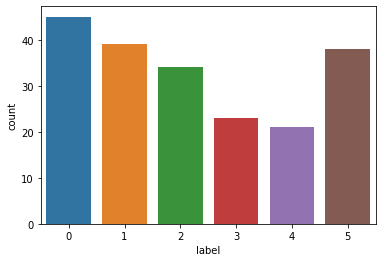

In [58]:
print(clust_data['label'].value_counts())
print('\n')
sns.countplot(x='label', data=clust_data)

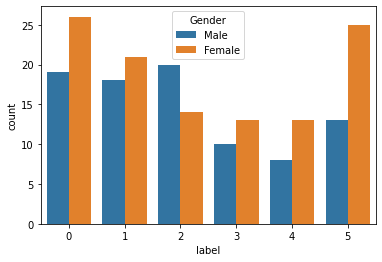

In [59]:
ax = sns.countplot(x="label", hue="Gender", data=clust_data)

In [60]:
fig = px.scatter(clust_data, x="Age", y="label",color="Gender")
fig.show()

In [61]:
fig = px.scatter(clust_data, x="Annual Income", y="label",color="Gender")
fig.show()

In [62]:
fig = px.scatter(clust_data, x="Spending Score", y="label",color="Gender")
fig.show()

#### **Insight**

Berdasarkan hasil klasterisasi dengan menggunakan K-Means, didapatkan **6** buah klaster dengan setiap klaster menunjukan karakteristik sebagai berikut:

**Cluster 0**: Terdapat 45 objek data yang termasuk dalam klaster ini. Mayoritas pelanggan pada klaster ini berjenis kelamin wanita. Rentang usia pelanggan pada klaster ini adalah 43-70 tahun. Rentang pendapatan pertaun pelanggan pada klaster ini adalah 3800-79000 dollar. Spending Score pelanggan pada klaster ini berada pada rentang 35-60. Sehingga klaster ini dapat disimpulkan memiliki karakteristik sebagai berikut:

* Female Majority
* Adult-Senior Group Age
* Medium Annual Income
* Medium Spending Score

**Cluster 1**: Terdapat 39 objek data yang termasuk dalam klaster ini. Mayoritas pelanggan pada klaster ini berjenis kelamin wanita. Rentang usia pelanggan pada klaster ini adalah 27-40 tahun. Rentang pendapatan pertaun pelanggan pada klaster ini adalah 6900-137000 dollar. Spending Score pelanggan pada klaster ini berada pada rentang 63-97. Sehingga klaster ini dapat disimpulkan memiliki karakteristik sebagai berikut:

* Female Majority
* Adult Group Age
* High Annual Income
* High Spending Score

**Cluster 2**: Terdapat 38 objek data yang termasuk dalam klaster ini. Mayoritas pelanggan pada klaster ini berjenis kelamin laki-laki. Rentang usia pelanggan pada klaster ini adalah 19-59 tahun. Rentang pendapatan pertaun pelanggan pada klaster ini adalah 7100-137000 dollar. Spending Score pelanggan pada klaster ini berada pada rentang 1-39. Sehingga klaster ini dapat disimpulkan memiliki karakteristik sebagai berikut:

* Male Majority
* Youth-Adult Group Age
* High Annual Income
* Low Spending Score

**Cluster 3**: Terdapat 34 objek data yang termasuk dalam klaster ini. Mayoritas pelanggan pada klaster ini berjenis kelamin wanita. Rentang usia pelanggan pada klaster ini adalah 18-35 tahun. Rentang pendapatan pertaun pelanggan pada klaster ini adalah 1500-39000 dollar. Spending Score pelanggan pada klaster ini berada pada rentang 39-99. Sehingga klaster ini dapat disimpulkan memiliki karakteristik sebagai berikut:

* Female Majority
* Youth-Adult Group Age
* Low Annual Income
* High Spending Score

**Cluster 4**: Terdapat 23 objek data yang termasuk dalam klaster ini. Mayoritas pelanggan pada klaster ini berjenis kelamin wanita. Rentang usia pelanggan pada klaster ini adalah 20-67 tahun. Rentang pendapatan pertaun pelanggan pada klaster ini adalah 1600-39000 dollar. Spending Score pelanggan pada klaster ini berada pada rentang 3-40. Sehingga klaster ini dapat disimpulkan memiliki karakteristik sebagai berikut:

* Female Majority
* Youth-Senior Group Age
* Low Annual Income
* High Spending Score

**Cluster 5**: Terdapat 21 objek data yang termasuk dalam klaster ini. Mayoritas pelanggan pada klaster ini berjenis kelamin wanita. Rentang usia pelanggan pada klaster ini adalah 18-40 tahun. Rentang pendapatan pertaun pelanggan pada klaster ini adalah 3900-76000 dollar. Spending Score pelanggan pada klaster ini berada pada rentang 29-61. Sehingga klaster ini dapat disimpulkan memiliki karakteristik sebagai berikut:

* Female Majority
* Youth-Adult Group Age
* Medium Annual Income
* Medium Spending Score